In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../../data/weather/bangkok_weather.csv")

In [3]:
df

,date,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation
0,2025-04-01,95.0,86.3,79.0,79.0,75.6,72.0,94.0,72.6,49.0,10.0,5.1,0.0,29.9,29.8,29.7,0.0
1,2025-04-02,95.0,87.4,82.0,79.0,72.7,66.0,89.0,63.7,41.0,12.0,6.5,2.0,29.9,29.8,29.8,0.0
2,2025-04-03,95.0,87.0,82.0,77.0,74.0,70.0,84.0,66.1,46.0,14.0,6.8,2.0,29.9,29.9,29.8,0.0
3,2025-04-04,93.0,86.4,82.0,77.0,74.8,73.0,84.0,69.1,52.0,15.0,7.7,2.0,29.9,29.8,29.7,0.0
4,2025-04-05,95.0,87.2,82.0,79.0,75.0,73.0,84.0,68.1,49.0,13.0,7.8,3.0,29.9,29.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9762,1997-01-27,84.0,77.0,73.0,70.0,66.6,64.0,88.0,71.1,55.0,10.0,5.4,0.0,30.0,29.9,29.9,0.0
9763,1997-01-28,91.0,81.7,72.0,68.0,66.2,64.0,88.0,62.3,41.0,6.0,2.6,0.0,30.0,29.9,29.8,0.0
9764,1997-01-29,95.0,84.2,73.0,68.0,63.7,59.0,69.0,52.2,32.0,10.0,2.1,0.0,29.9,26.9,0.0,0.0
9765,1997-01-30,95.0,83.0,73.0,75.0,71.6,70.0,94.0,70.6,49.0,8.0,1.7,0.0,29.8,29.8,29.7,0.0


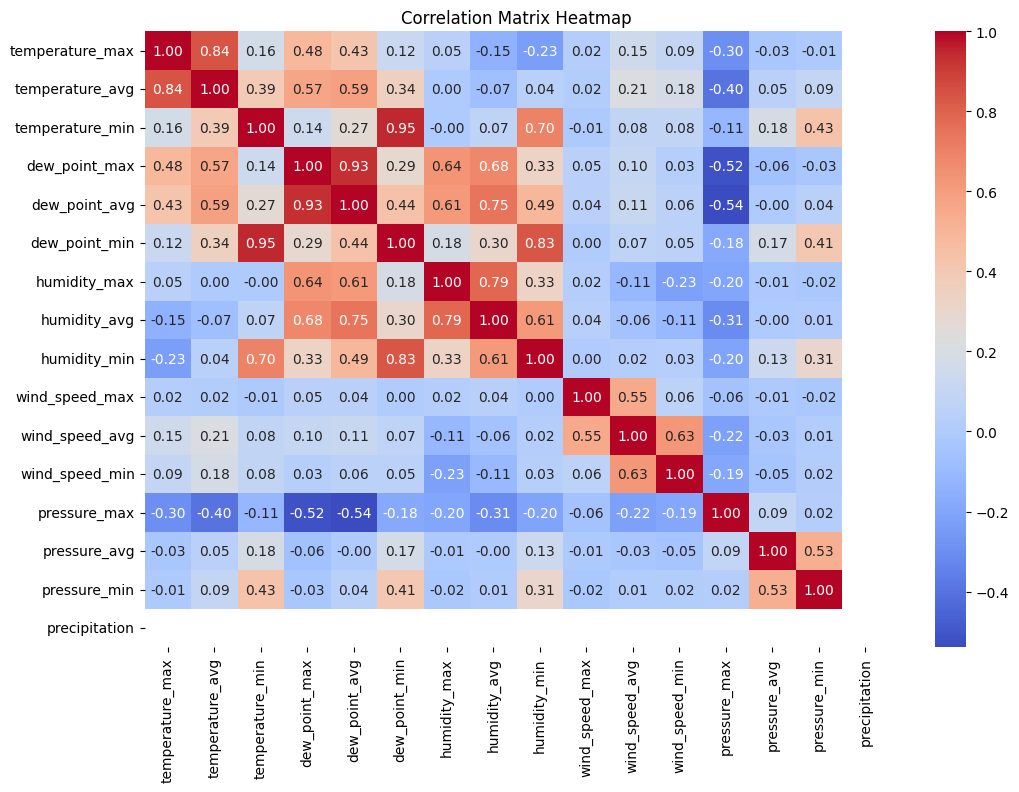

In [4]:
import seaborn as sns

# Exclude non-numeric columns and calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
correlation_matrix

import matplotlib.pyplot as plt

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

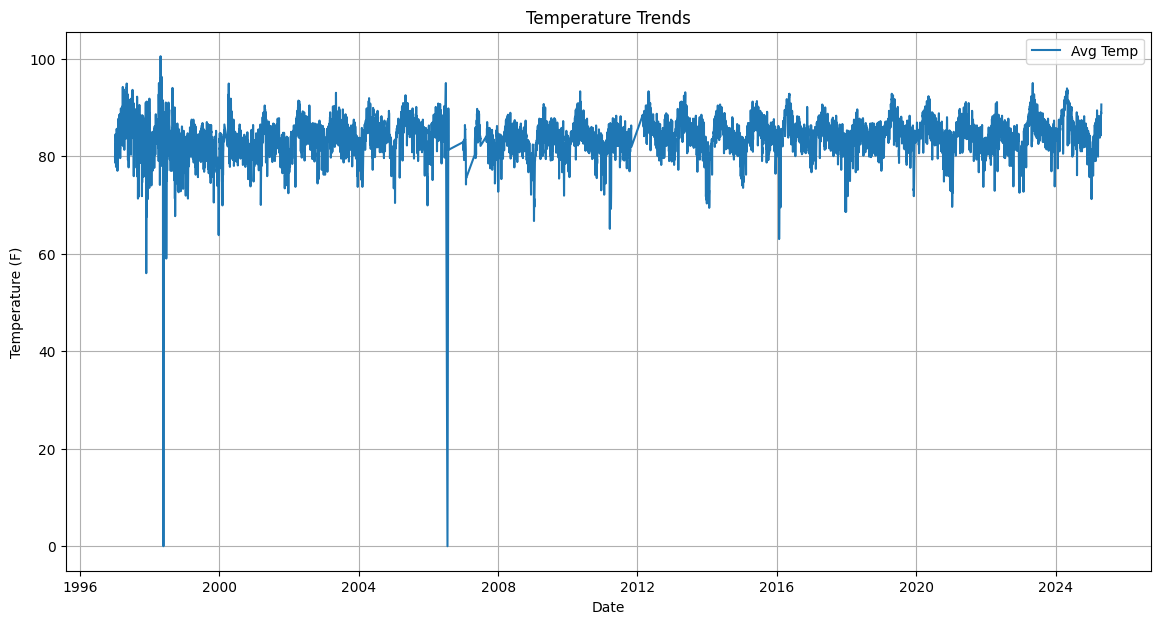

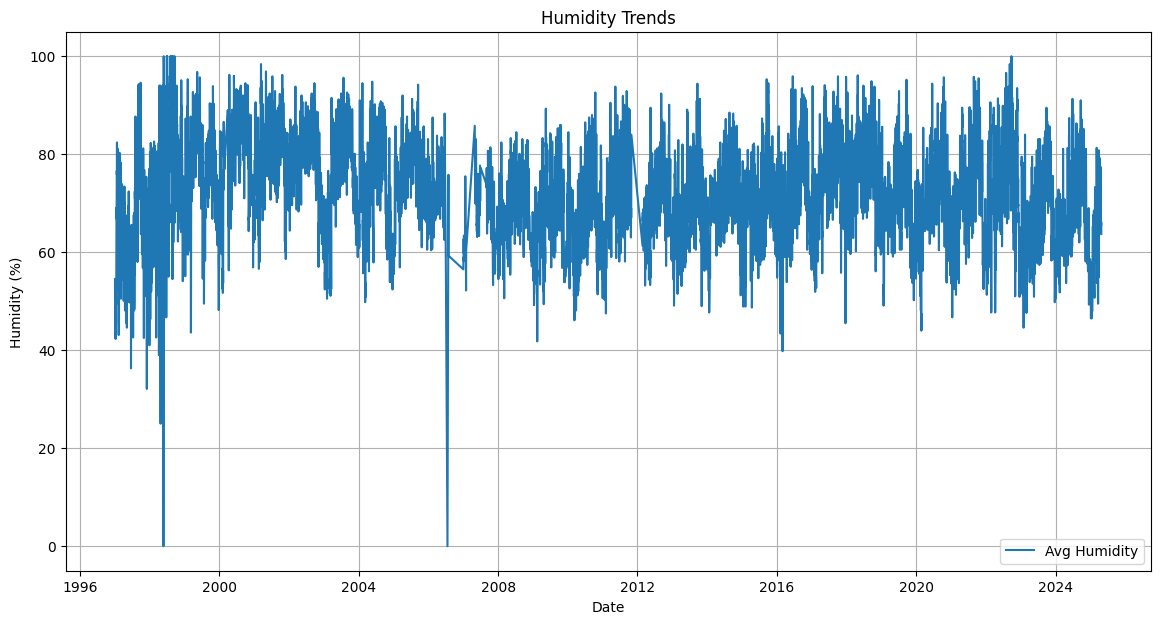

Predicted Avg Temp on 2025-04-26: 84.70 F
Predicted Avg Temp on 2025-04-27: 84.70 F
Predicted Avg Temp on 2025-04-28: 84.70 F


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your DataFrame (assuming you already have it as 'df')
# df = pd.read_csv('your_data.csv')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date just in case
df = df.sort_values('date')

# Plot temperatures
plt.figure(figsize=(14, 7))
# plt.plot(df['date'], df['temperature_max'], label='Max Temp')
plt.plot(df['date'], df['temperature_avg'], label='Avg Temp')
# plt.plot(df['date'], df['temperature_min'], label='Min Temp')
plt.title('Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend()
plt.grid(True)
plt.show()

# Plot humidity
plt.figure(figsize=(14, 7))
# plt.plot(df['date'], df['humidity_max'], label='Max Humidity')
plt.plot(df['date'], df['humidity_avg'], label='Avg Humidity')
# plt.plot(df['date'], df['humidity_min'], label='Min Humidity')
plt.title('Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.show()

# --- Step 2: Simple Prediction for next 3 days --- #

# We'll predict based on 'temperature_avg' for simplicity
# Encode date as ordinal number (days since 1-1-1)
df['date_ordinal'] = df['date'].map(pd.Timestamp.toordinal)

# Model
X = df['date_ordinal'].values.reshape(-1, 1)
y = df['temperature_avg'].values

model = LinearRegression()
model.fit(X, y)

# Predict next 3 days
tomorrow = df['date'].max() + pd.Timedelta(days=1)
future_dates = [tomorrow + pd.Timedelta(days=i) for i in range(3)]
future_ordinals = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)

predictions = model.predict(future_ordinals)

# Show predictions
for date, temp in zip(future_dates, predictions):
    print(f"Predicted Avg Temp on {date.strftime('%Y-%m-%d')}: {temp:.2f} F")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


        date  predicted_temperature_avg
0 2025-04-26                  89.662541
1 2025-04-27                  89.421790
2 2025-04-28                  89.571526


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


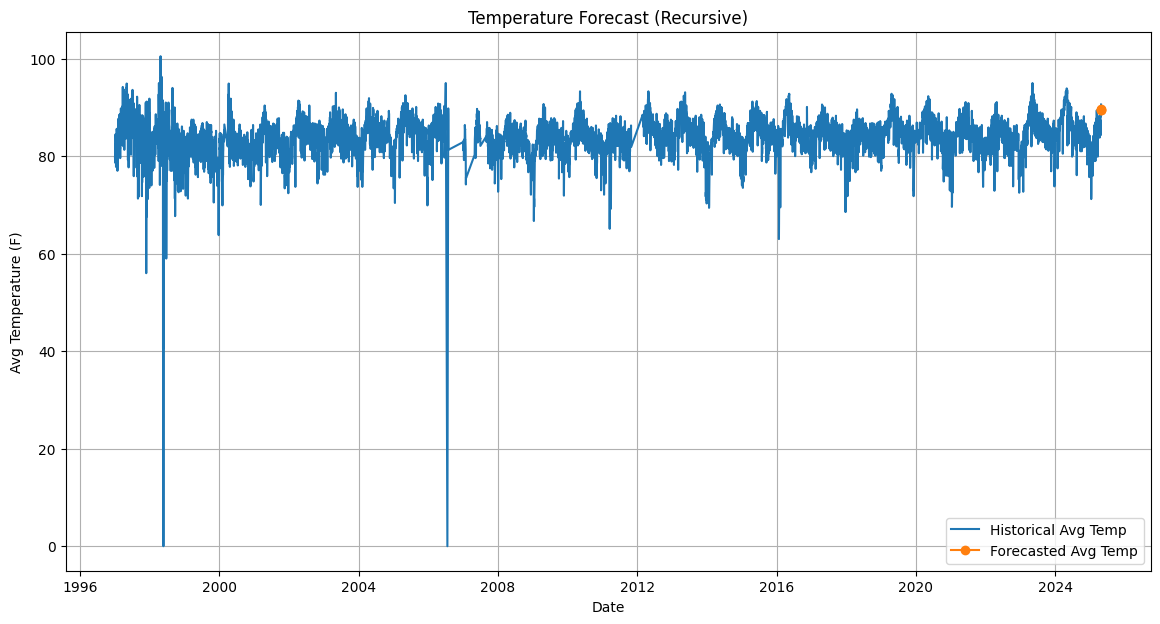

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assume you already have 'df' loaded
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Set 'date' as the index
df.set_index('date', inplace=True)

# Focus on the 'temperature_avg'
series = df['temperature_avg']

# Build ARIMA model (order can be tuned)
model = ARIMA(series, order=(5, 1, 0))  # (p=5, d=1, q=0) basic setup
model_fit = model.fit()

# Forecast next 3 days recursively
forecast_steps = 3
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates
last_date = series.index[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, forecast_steps + 1)]

# Create a DataFrame for predicted results
forecast_df = pd.DataFrame({
    'date': future_dates,
    'predicted_temperature_avg': forecast.values
})

# Display predictions
print(forecast_df)

# --- Plot the historical and forecasted temperatures ---
plt.figure(figsize=(14, 7))
plt.plot(series.index, series.values, label='Historical Avg Temp')
plt.plot(forecast_df['date'], forecast_df['predicted_temperature_avg'], label='Forecasted Avg Temp', marker='o')
plt.title('Temperature Forecast (Recursive)')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (F)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# https://people.duke.edu/~rnau/411arim.html
# https://medium.com/@danaytaman/time-series-forecasting-vs-regression-cf89d0d0f3bd